In [ ]:
import cv2
from numpy import mgrid, sum
from sklearn.svm import SVC
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [ ]:
print("Loading data...")
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Loading data...
170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
(n,x,y,m)=X_train.shape
for i in range(1, 3+1):
   print (X_train[i])
   print()
   print (Y_train[i])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]

[9]
[[[255 255 255]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[113 120 112]
  [111 118 111]
  [105 112 106]

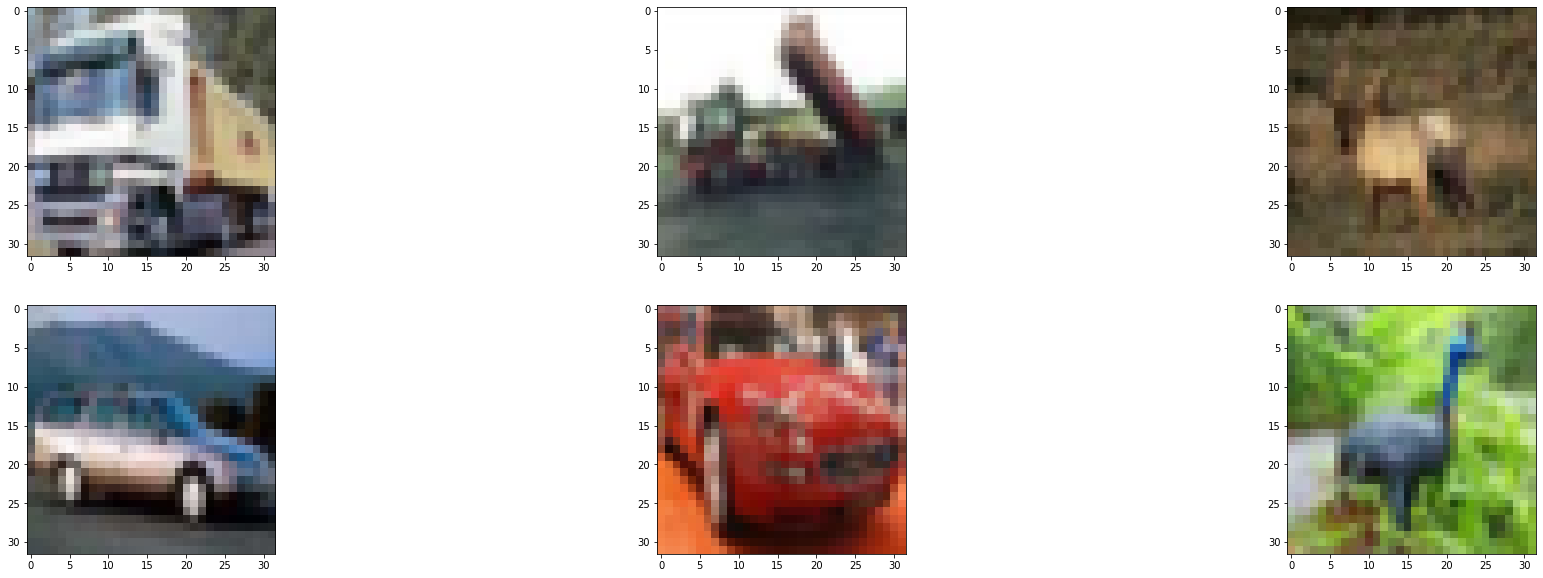

In [ ]:
fig=plt.figure(figsize=(32, 32))
for i in range(1, 6+1):
   fig.add_subplot(6, 3, i)
   plt.imshow(X_train[i])
  

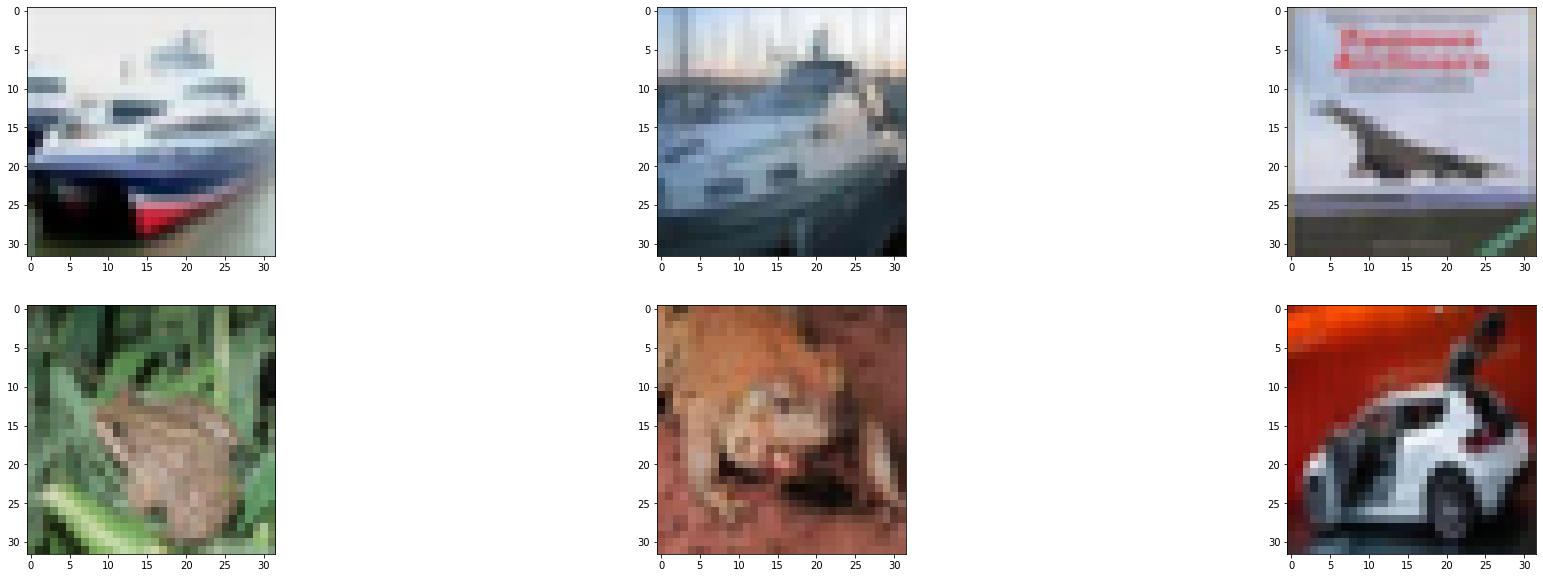

In [ ]:
fig=plt.figure(figsize=(32, 32))
for i in range(1, 6+1):
   fig.add_subplot(6, 3, i)
   plt.imshow(X_test[i])

In [ ]:
 def centralmoments(image,c):
  y,x = mgrid[:image.shape[0],:image.shape[1]]
  n=int((c+2)*(c+1)/2)
  moments = np.zeros(n)
  image=image/255
  sumim=sum(image)
  miox = sum(x*image)/sumim
  mioy = sum(y*image)/sumim
  x=x-miox
  y=y-mioy
  i=0
  for p in range(c+1):
      for q in range(c-p+1):
          moments[i] = sum(x ** p*y ** q*image)
          i=i+1
  return moments

In [ ]:
def TestSVM(svc,X_testFeat,Y_test):
  ntest=len(X_testFeat)
  #Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
  score=svc.score(X_testFeat, np.ravel(Y_test))
  print(score)

In [ ]:
print("Feature extraction...")
ntrain=10000
c=3
n=int((c+2)*(c+1)/2)
X_trainFeat=np.zeros([ntrain,n])
for i in range(ntrain):
    array=np.array(X_train[i])
    array=cv2.cvtColor(array,cv2.COLOR_BGR2GRAY)
    X_trainFeat[i]=np.array(centralmoments(array,c))
print( X_trainFeat)

Feature extraction...
[[ 3.89274510e+02 -1.13686838e-12  2.94104517e+04 ...  3.07238811e+04
   7.08518366e+03 -5.40227501e+03]
 [ 5.23537255e+02  2.27373675e-13  3.89137945e+04 ...  4.13912775e+04
   3.83921080e+04  4.14919251e+04]
 [ 5.38709804e+02  4.54747351e-13  4.33381940e+04 ...  4.94056109e+04
  -1.72183738e+03  6.89768244e+04]
 ...
 [ 4.04980392e+02  2.27373675e-13  3.28718646e+04 ...  3.00262403e+04
   3.02310323e+04  3.26929295e+04]
 [ 5.04705882e+02  4.54747351e-13  3.99296029e+04 ...  5.61030450e+04
   9.04378225e+03  1.25983332e+05]
 [ 5.06074510e+02  2.27373675e-13  3.96608603e+04 ...  4.07876663e+04
   1.73609566e+04  1.16284906e+04]]


In [ ]:
ntest=len(X_test)
X_testFeat=np.zeros([ntest,n])
for i in range(ntest):
    array=np.array(X_test[i])
    array=cv2.cvtColor(array,cv2.COLOR_BGR2GRAY)
    X_testFeat[i]=centralmoments(array,c)
#print( X_testFeat)

In [ ]:
print("Training linear kernel svm...")
svc1 = Pipeline([('scaler', StandardScaler()),
                  ('svc', SVC(kernel='linear'))])
svc1.fit(X_trainFeat, np.ravel(Y_train[0:ntrain]))

Training linear kernel svm...


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
print("Training rbf kernel svm...")
svc2 = Pipeline([('scaler', StandardScaler()),
                  ('svc', SVC(kernel='rbf'))])
svc2.fit(X_trainFeat, np.ravel(Y_train[0:ntrain]))


Training rbf kernel svm...


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
print("Training polynomial kernel svm...")
svc3 = Pipeline([('scaler', StandardScaler()),
                  ('svc', SVC(kernel='poly'))])
svc3.fit(X_trainFeat, np.ravel(Y_train[0:ntrain]))


Training polynomial kernel svm...


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
print("Training sigmoid kernel svm...")
svc4 = Pipeline([('scaler', StandardScaler()),
                  ('svc', SVC(kernel='sigmoid'))])
svc4.fit(X_trainFeat, np.ravel(Y_train[0:ntrain]))


Training sigmoid kernel svm...


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='sigmoid', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
print("Testing accuracy of linear kernel svm...")
TestSVM(svc1,X_testFeat, Y_test);

Testing accuracy of linear kernel svm...
0.2566


In [ ]:
Y_predicted_linear=svc1.predict(X_testFeat)
print("Confusion matrix")
print(confusion_matrix(np.ravel(Y_test[0:ntest]),Y_predicted_linear))


Confusion matrix
[[356  30  44  36  37  30  79  58 228 102]
 [ 64 200  28  36  61  37 186  50 144 194]
 [179  83 120  89  60  55 251  57  64  42]
 [ 87  75  47 135  80 155 231  69  57  64]
 [ 73  61  87  58 120  58 361  62  53  67]
 [ 55  71  49  98  83 262 161  63 105  53]
 [ 59  86  52  87  60  67 410  78  33  68]
 [ 70  73  41  53 126  68 171 122  97 179]
 [ 73  69  23  48  28  81  54  16 442 166]
 [ 60 106  18  25  30  15 101  65 181 399]]


In [ ]:
print(classification_report(np.ravel(Y_test[0:ntest]),Y_predicted_linear))

              precision    recall  f1-score   support

           0       0.33      0.36      0.34      1000
           1       0.23      0.20      0.22      1000
           2       0.24      0.12      0.16      1000
           3       0.20      0.14      0.16      1000
           4       0.18      0.12      0.14      1000
           5       0.32      0.26      0.29      1000
           6       0.20      0.41      0.27      1000
           7       0.19      0.12      0.15      1000
           8       0.31      0.44      0.37      1000
           9       0.30      0.40      0.34      1000

    accuracy                           0.26     10000
   macro avg       0.25      0.26      0.24     10000
weighted avg       0.25      0.26      0.24     10000



In [ ]:
print("Testing accuracy of rbf kernel svm...")
TestSVM(svc2,X_testFeat, Y_test);

Testing accuracy of rbf kernel svm...
0.2829


In [ ]:
Y_predicted_rbf=svc2.predict(X_testFeat)
print("Confusion matrix...")
print(confusion_matrix(np.ravel(Y_test[0:ntest]),Y_predicted_rbf))


Confusion matrix...
[[383  28  67  30 101  15  73  27 208  68]
 [ 63 237  21  77  71  27 167  41 120 176]
 [165  71  92  94 189  55 194  34  66  40]
 [ 74  71  43 246  82 121 172  68  50  73]
 [ 80  56  65  56 300  43 258  46  57  39]
 [ 68  67  64 202  99 192 121  63  77  47]
 [ 66  72  55  67 172  33 399  54  37  45]
 [ 72  84  33 105 167  61 126 136  82 134]
 [ 88  66  34  73  62  38  51  26 449 113]
 [ 60 130  15  57  43  26  70  55 149 395]]


In [ ]:
print(classification_report(np.ravel(Y_test[0:ntest]),Y_predicted_rbf))

              precision    recall  f1-score   support

           0       0.34      0.38      0.36      1000
           1       0.27      0.24      0.25      1000
           2       0.19      0.09      0.12      1000
           3       0.24      0.25      0.25      1000
           4       0.23      0.30      0.26      1000
           5       0.31      0.19      0.24      1000
           6       0.24      0.40      0.30      1000
           7       0.25      0.14      0.18      1000
           8       0.35      0.45      0.39      1000
           9       0.35      0.40      0.37      1000

    accuracy                           0.28     10000
   macro avg       0.28      0.28      0.27     10000
weighted avg       0.28      0.28      0.27     10000



In [ ]:
print("Testing accuracy of polynomial kernel svm...")
TestSVM(svc3,X_testFeat, Y_test);

Testing accuracy of polynomial kernel svm...
0.2279


In [ ]:
Y_predicted_poly=svc3.predict(X_testFeat)
print("Confusion matrix...")
print(confusion_matrix(np.ravel(Y_test[0:ntest]),Y_predicted_poly))

Confusion matrix...
[[218  22 172  14  50  11 260  29 174  50]
 [ 37 150 114  25  75  10 342  31 104 112]
 [ 71  34 206  27  77  24 466  22  47  26]
 [ 46  42 122  88  96  85 392  48  43  38]
 [ 28  25 125  26 150  19 560  26  29  12]
 [ 36  38 150  88  97 111 361  39  60  20]
 [ 32  32  83  31  76  20 654  38  16  18]
 [ 30  43 146  41 115  46 358  80  59  82]
 [ 52  41 136  17  50  21 242  22 362  57]
 [ 47 112 104  16  45  12 227  44 133 260]]


In [ ]:
print(classification_report(np.ravel(Y_test[0:ntest]),Y_predicted_poly))

              precision    recall  f1-score   support

           0       0.37      0.22      0.27      1000
           1       0.28      0.15      0.19      1000
           2       0.15      0.21      0.17      1000
           3       0.24      0.09      0.13      1000
           4       0.18      0.15      0.16      1000
           5       0.31      0.11      0.16      1000
           6       0.17      0.65      0.27      1000
           7       0.21      0.08      0.12      1000
           8       0.35      0.36      0.36      1000
           9       0.39      0.26      0.31      1000

    accuracy                           0.23     10000
   macro avg       0.26      0.23      0.22     10000
weighted avg       0.26      0.23      0.22     10000



In [ ]:
print("Testing accuracy of sigmoid kernel svm...")
TestSVM(svc4,X_testFeat, Y_test);


Testing accuracy of sigmoid kernel svm...
0.1277


In [ ]:
Y_predicted_sig=svc4.predict(X_testFeat)
print("Confusion matrix...")
print(confusion_matrix(np.ravel(Y_test[0:ntest]),Y_predicted_sig))

Confusion matrix...
[[452  56   2 259  46  10   9  57  51  58]
 [290 113   1 249  52  13  52  72  83  75]
 [395  89   6 273  47  19  41  61  24  45]
 [341  86   4 305  62  32  58  46  39  27]
 [305  99   4 312  52  50  51  67  30  30]
 [363  85   7 301  65  37  52  40  27  23]
 [269 148   7 317  52  36  59  56  10  46]
 [401  88   8 234  69  13  35  58  38  56]
 [447 114   1 167  32  17  15  59  85  63]
 [353  83   2 179  39   4  24  63 143 110]]


In [ ]:
print(classification_report(np.ravel(Y_test[0:ntest]),Y_predicted_sig))

              precision    recall  f1-score   support

           0       0.12      0.45      0.20      1000
           1       0.12      0.11      0.12      1000
           2       0.14      0.01      0.01      1000
           3       0.12      0.30      0.17      1000
           4       0.10      0.05      0.07      1000
           5       0.16      0.04      0.06      1000
           6       0.15      0.06      0.08      1000
           7       0.10      0.06      0.07      1000
           8       0.16      0.09      0.11      1000
           9       0.21      0.11      0.14      1000

    accuracy                           0.13     10000
   macro avg       0.14      0.13      0.10     10000
weighted avg       0.14      0.13      0.10     10000



In [ ]:
print("Gussian Naiive Bayes Classifier")
GNB = GaussianNB()
Y_predicted_GNB=GNB.fit(X_trainFeat, np.ravel(Y_train[0:ntrain])).predict(X_testFeat)
print("Testing accuracy of Naiive Bayes Gussian Classifier...")
accuracy_score(np.ravel(Y_test[0:ntest]),Y_predicted_GNB)


Gussian Naiive Bayes Classifier
Testing accuracy of Naiive Bayes Gussian Classifier...


0.2308

In [ ]:
print("the confusion matrix in nb")
print(confusion_matrix(np.ravel(Y_test[0:ntest]),Y_predicted_GNB))



the confusion matrix in nb
[[473   4   8  13 205  10  61  18 154  54]
 [104  78   3  54 188  43 211  26 114 179]
 [211  14  20  48 321  40 191  27  71  57]
 [107  16  14 148 188  96 226  53  66  86]
 [105  11  12  24 444  42 229  29  70  34]
 [ 92  21  21 107 248 127 185  46  92  61]
 [ 87  17  16  36 333  33 335  32  56  55]
 [111  27  13  66 305  56 111  63 124 124]
 [202  18  11  35 190  40  66  29 242 167]
 [103  47   6  41 118  28  83  33 163 378]]


In [ ]:
print(classification_report(np.ravel(Y_test[0:ntest]),Y_predicted_GNB))

              precision    recall  f1-score   support

           0       0.30      0.47      0.36      1000
           1       0.31      0.08      0.12      1000
           2       0.16      0.02      0.04      1000
           3       0.26      0.15      0.19      1000
           4       0.17      0.44      0.25      1000
           5       0.25      0.13      0.17      1000
           6       0.20      0.34      0.25      1000
           7       0.18      0.06      0.09      1000
           8       0.21      0.24      0.22      1000
           9       0.32      0.38      0.34      1000

    accuracy                           0.23     10000
   macro avg       0.23      0.23      0.20     10000
weighted avg       0.23      0.23      0.20     10000



In [ ]:
print("KNN_Classifier")
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_trainFeat,np.ravel(Y_train[0:ntrain]))
Y_predicted_KNN=KNN.predict(X_testFeat)
print("Accuracy:",metrics.accuracy_score(np.ravel(Y_test[0:ntest]),Y_predicted_KNN))

KNN_Classifier
Accuracy: 0.2003


In [ ]:
"""
 k=3
Accuracy: 0.1784
the confusion matrix in knn
array([[434,  85, 152,  58,  74,  29,  37,  32,  67,  32],
     [172, 268, 116, 109,  77,  49,  42,  39,  53,  75],
      [238, 128, 231, 107, 110,  54,  56,  31,  23,  22],
       [166, 145, 184, 189,  93,  79,  50,  36,  34,  24],
       [189, 140, 197, 113, 158,  43,  89,  30,  28,  13],
      [163, 166, 186, 160, 105,  76,  63,  46,  10,  25],
      [196, 148, 199, 116, 120,  60, 112,  20,  16,  13],
     [201, 181, 127, 116, 111,  53,  52,  65,  47,  47],
        [270, 161, 123,  87,  64,  37,  33,  46, 117,  62],
       [206, 226,  80,  83,  63,  44,  36,  56,  72, 134]])

#################################################################
precision    recall  f1-score   support

           0       0.19      0.43      0.27      1000
           1       0.16      0.27      0.20      1000
           2       0.14      0.23      0.18      1000
           3       0.17      0.19      0.18      1000
           4       0.16      0.16      0.16      1000
           5       0.15      0.08      0.10      1000
           6       0.20      0.11      0.14      1000
           7       0.16      0.07      0.09      1000
           8       0.25      0.12      0.16      1000
           9       0.30      0.13      0.19      1000

    accuracy                           0.18     10000
   macro avg       0.19      0.18      0.17     10000
weighted avg       0.19      0.18      0.17     10000


"""
"""
k=5
Accuracy: 0.1931
the confusion matrix in knn
array([[398,  64, 131,  42,  75,  32,  54,  52, 101,  51],
       [136, 219,  91,  87,  87,  45,  72,  66,  97, 100],
       [219,  94, 179, 101, 119,  67,  89,  44,  48,  40],
       [150, 112, 139, 153,  87, 101, 102,  58,  52,  46],
       [166, 102, 164,  83, 166,  62, 119,  66,  46,  26],
       [131, 128, 144, 143, 106, 115, 105,  59,  33,  36],
       [165, 120, 141, 100, 130,  62, 174,  46,  33,  29],
       [164, 103,  95,  87, 119,  75,  77, 113,  98,  69],
       [214, 121,  91,  65,  48,  38,  45,  70, 206, 102],
       [163, 154,  55,  57,  47,  35,  52,  80, 149, 208]])

####################################################
precision    recall  f1-score   support

           0       0.21      0.40      0.27      1000
           1       0.18      0.22      0.20      1000
           2       0.15      0.18      0.16      1000
           3       0.17      0.15      0.16      1000
           4       0.17      0.17      0.17      1000
           5       0.18      0.12      0.14      1000
           6       0.20      0.17      0.18      1000
           7       0.17      0.11      0.14      1000
           8       0.24      0.21      0.22      1000
           9       0.29      0.21      0.24      1000

    accuracy                           0.19     10000
   macro avg       0.20      0.19      0.19     10000
weighted avg       0.20      0.19      0.19     10000


"""
"""
k=100
Accuracy: 0.2374
the confusion matrix in knn
array([[343,   9, 132,  34,  92,  16,  65,  21, 186, 102],
       [ 69, 133,  78,  65,  85,  40, 178,  21, 168, 163],
       [165,  38, 195,  92, 153,  41, 186,  17,  71,  42],
       [ 74,  33,  97, 187, 158,  91, 187,  38,  63,  72],
       [ 87,  26, 191,  53, 289,  37, 201,  19,  68,  29],
       [ 72,  41, 105, 162, 193,  95, 182,  38,  61,  51],
       [ 95,  37, 132,  69, 155,  39, 351,  30,  58,  34],
       [ 91,  42,  87,  90, 201,  57, 111,  58, 144, 119],
       [106,  27,  88,  60,  70,  28,  75,  26, 330, 190],
       [ 67,  60,  45,  44,  49,  26,  84,  27, 205, 393]])
  ########################################################
    precision    recall  f1-score   support

           0       0.29      0.34      0.32      1000
           1       0.30      0.13      0.18      1000
           2       0.17      0.20      0.18      1000
           3       0.22      0.19      0.20      1000
           4       0.20      0.29      0.24      1000
           5       0.20      0.10      0.13      1000
           6       0.22      0.35      0.27      1000
           7       0.20      0.06      0.09      1000
           8       0.24      0.33      0.28      1000
           9       0.33      0.39      0.36      1000

    accuracy                           0.24     10000
   macro avg       0.24      0.24      0.22     10000
weighted avg       0.24      0.24      0.22     10000


"""

'\nk=100\nAccuracy: 0.2374\nthe confusion matrix in knn\narray([[343,   9, 132,  34,  92,  16,  65,  21, 186, 102],\n       [ 69, 133,  78,  65,  85,  40, 178,  21, 168, 163],\n       [165,  38, 195,  92, 153,  41, 186,  17,  71,  42],\n       [ 74,  33,  97, 187, 158,  91, 187,  38,  63,  72],\n       [ 87,  26, 191,  53, 289,  37, 201,  19,  68,  29],\n       [ 72,  41, 105, 162, 193,  95, 182,  38,  61,  51],\n       [ 95,  37, 132,  69, 155,  39, 351,  30,  58,  34],\n       [ 91,  42,  87,  90, 201,  57, 111,  58, 144, 119],\n       [106,  27,  88,  60,  70,  28,  75,  26, 330, 190],\n       [ 67,  60,  45,  44,  49,  26,  84,  27, 205, 393]])\n  ########################################################\n    precision    recall  f1-score   support\n\n           0       0.29      0.34      0.32      1000\n           1       0.30      0.13      0.18      1000\n           2       0.17      0.20      0.18      1000\n           3       0.22      0.19      0.20      1000\n           4   

In [ ]:
print("the confusion matrix in knn")
print(confusion_matrix(np.ravel(Y_test[0:ntest]),Y_predicted_KNN))

the confusion matrix in knn
[[375  65 139  48  75  43  53  39 111  52]
 [105 213 104  82  90  63  82  60 106  95]
 [195  75 189 106 132  72  95  51  50  35]
 [115  87 128 178 121 118 106  56  51  40]
 [138  80 154  97 197  66 144  54  51  19]
 [113 101 146 154 121 132  98  64  33  38]
 [128 102 158 107 149  75 177  47  32  25]
 [132  99 107  95 143  79  74 110  85  76]
 [192  99  98  74  61  40  50  77 203 106]
 [138 143  63  65  51  48  55  76 132 229]]


In [ ]:
print(classification_report(np.ravel(Y_test[0:ntest]),Y_predicted_KNN))


              precision    recall  f1-score   support

           0       0.23      0.38      0.29      1000
           1       0.20      0.21      0.21      1000
           2       0.15      0.19      0.17      1000
           3       0.18      0.18      0.18      1000
           4       0.17      0.20      0.18      1000
           5       0.18      0.13      0.15      1000
           6       0.19      0.18      0.18      1000
           7       0.17      0.11      0.13      1000
           8       0.24      0.20      0.22      1000
           9       0.32      0.23      0.27      1000

    accuracy                           0.20     10000
   macro avg       0.20      0.20      0.20     10000
weighted avg       0.20      0.20      0.20     10000



In [ ]:
"""
accuarcy of each classifier
c=3

svmlinear
0.2566

svmrbf
0.2829

svmpoly
0.2279

svmsigmoid
0.1277

guassian
0.2308

knn
k=3
0.1784
k=5
0.1931
k=100
0.2374

# the best is svm rbf

"""

'\naccuarcy of each classifier\nc=3\n\nsvmlinear\n0.2566\n\nsvmrbf\n0.2829\n\nsvmpoly\n0.2279\n\nsvmsigmoid\n0.1277\n\nguassian\n0.2308\n\nknn\nk=3\n0.1784\nk=5\n0.1931\nk=100\n0.2374\n\n# the best is svm rbf\n\n'

In [ ]:
print("Training Neural Network...")
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_trainFeat,np.ravel( Y_train[0:ntrain]))
score=clf.score(X_testFeat, np.ravel(Y_test))
print("Accuarcy:")
print(score)
Y_predicted_NN=clf.predict(X_testFeat)
print("confusion_matrix:")
print(confusion_matrix(np.ravel(Y_test[0:ntest]),Y_predicted_NN))



Training Neural Network...
Accuarcy:
0.1
confusion_matrix:
[[1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]]


In [ ]:
print(classification_report(np.ravel(Y_test[0:ntest]),Y_predicted_NN))

              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
